# Minima

(array([0.2894, 0.3905, 0.5436, 0.6963]), array([5.82265204e-04, 8.61527644e-02, 4.98477492e-02, 5.74210324e-05]), array([2794, 3805, 5336, 6863], dtype=int64))
(0.2893999999999983, 0.0005822652044197551, 2794)


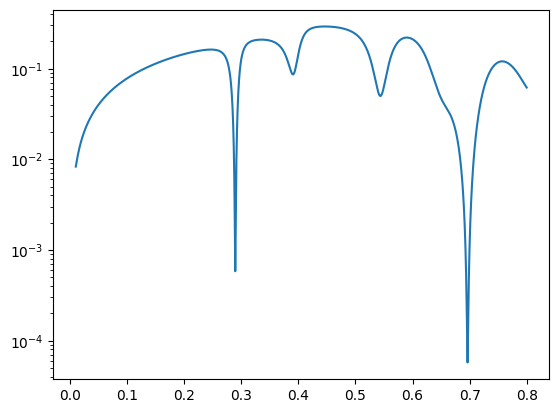

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

lay_Pt_top = nx.Layer(id = "Pt top",
                material = nx.Material.Template(nx.lib.material.Pt),
                thickness = 2,
                roughness = 0.2)


lay_C = nx.Layer(id = "C",
                material = nx.Material.Template(nx.lib.material.C),
                thickness = 10,
                roughness = 0.3)

lay_Fe = nx.Layer(id = "Fe",
                  material = nx.Material.Template(nx.lib.material.Fe_enriched),
                  thickness = 1.5,
                  roughness = 0.35)

lay_Pt = nx.Layer(id = "Pt",
                material = nx.Material.Template(nx.lib.material.Pt),
                thickness = 15,
                roughness = 0.77)

lay_substrate = nx.Layer(id = "Si sub",
                material = nx.Material.Template(nx.lib.material.Si),
                thickness = nx.inf,
                roughness = 0.4
                )

sample1 = nx.Sample(id = "cavity",
                    layers = [lay_Pt_top,
                              lay_C,
                              lay_Fe,
                              lay_C,
                              lay_Pt,
                              lay_substrate],
                     geometry = "r",
                     length = 10,
                     roughness = "a")

beam  = nx.Beam(profile = "g", fwhm = 0.2)
beam.Unpolarized()

exp = nx.Experiment(beam = beam,
                    objects = [sample1],
                    id = "my exp")

angles = np.arange(0.01, 0.8, 0.0001)

reflectivity = nx.Reflectivity(experiment = exp,
                               sample = sample1,
                               energy = nx.lib.energy.CuKalpha,
                               angles = angles)

refl = reflectivity()

print(nx.data.FindMinima(angles, refl))

print(nx.data.FindMinima(angles, refl, n=1))

plt.semilogy(angles, reflectivity())
plt.show()